# Importing important libraries

In [11]:
import yfinance as yf
import pandas as pd
import statistics
from scipy.stats import norm
import pandas_datareader as data
import matplotlib as plt
plt.rcParams["figure.figsize"] = (20, 10)
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

# Using yfinance and Matplotlib

In [4]:
stock="RELIANCE.NS"

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

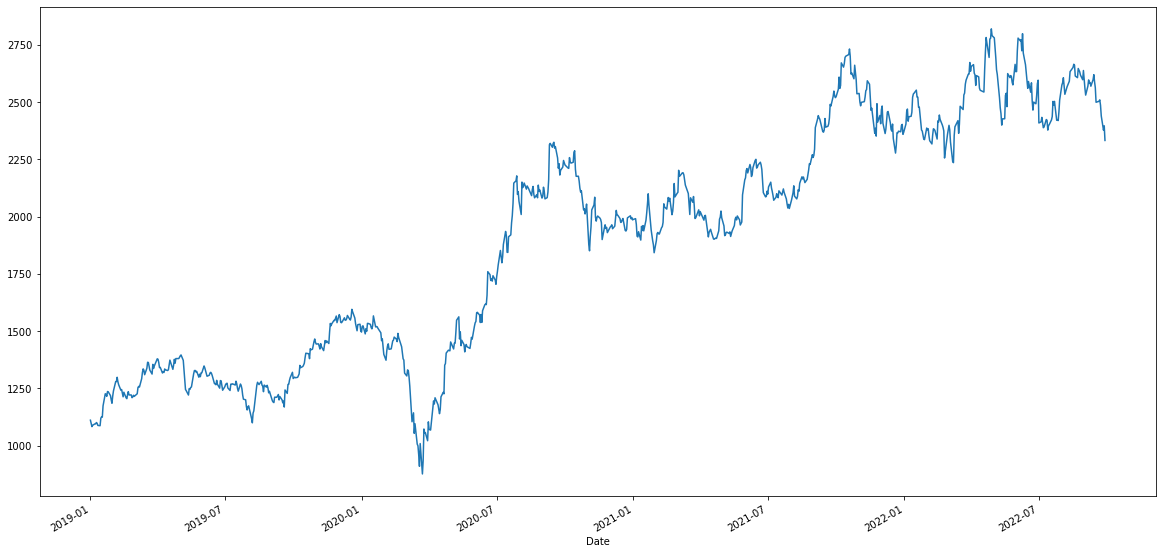

In [7]:
df=yf.download(tickers=stock,start='2019-1-1')
#df=yf.download(tickers=stock)['Adj Close']
df
df['Close'].plot()

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:xlabel='Date'>

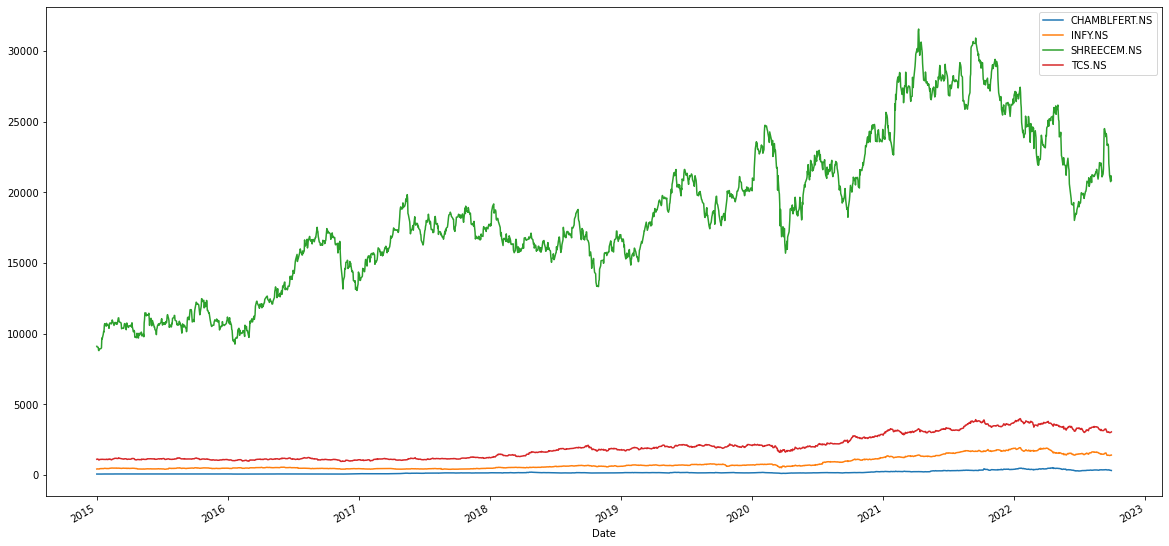

In [8]:
df=yf.download(tickers=["CHAMBLFERT.NS","TCS.NS","INFY.NS","SHREECEM.NS"],start='2015-1-1')['Adj Close']
df.plot()

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:xlabel='Date'>

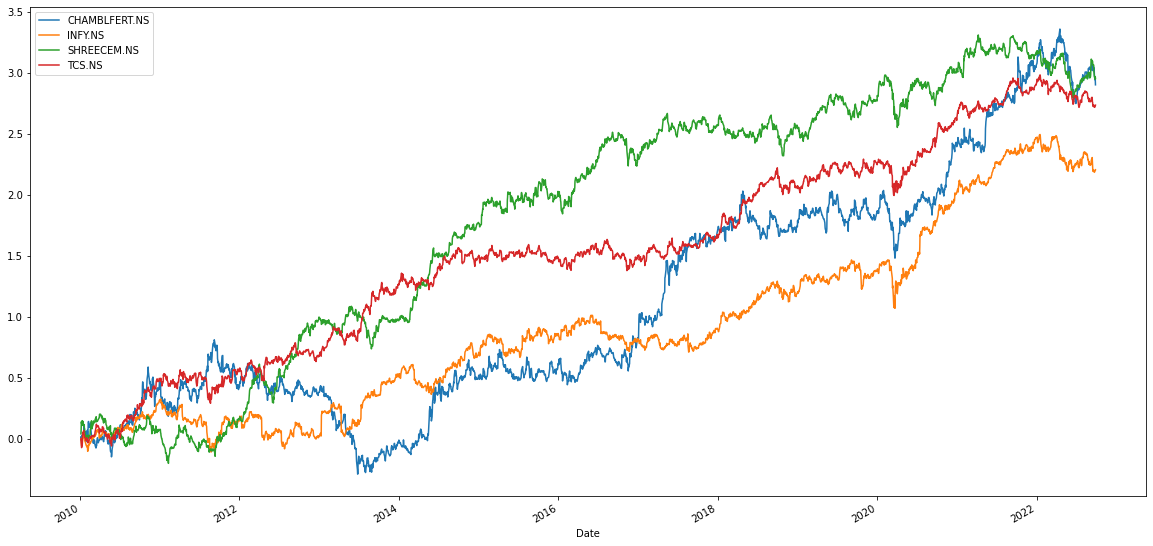

In [9]:
df=yf.download(tickers=["CHAMBLFERT.NS","TCS.NS","INFY.NS","SHREECEM.NS"],start='2010-1-1')['Adj Close'].pct_change()
df=df.dropna()
np.cumsum(df).plot()

# Returns and their distribution

In [14]:
df=yf.download(tickers="SHREECEM.NS",start="2007-1-1")
df['pct']=df['Adj Close'].pct_change()
df=df.dropna()

[*********************100%***********************]  1 of 1 completed


((-0.14502323726242072, 0.16859727606850217),
 (Timestamp('2008-10-24 00:00:00'), Timestamp('2008-01-23 00:00:00')))

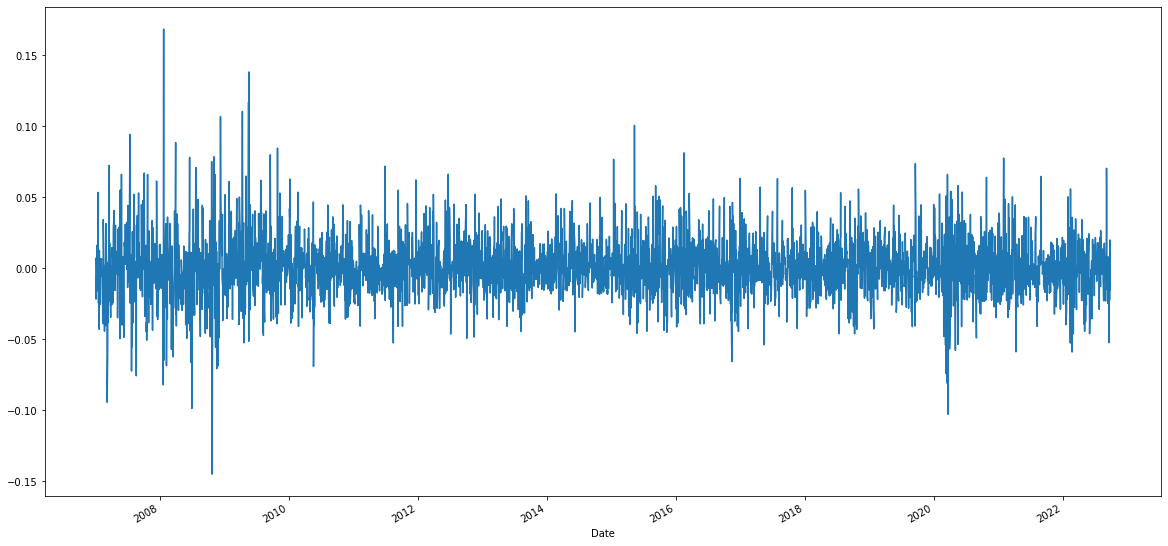

In [15]:
df['pct'].plot()
(df['pct'].min(),df['pct'].max()),(df['pct'].idxmin(),df['pct'].idxmax())

(<AxesSubplot:xlabel='Date'>, 3.5658057936368155)

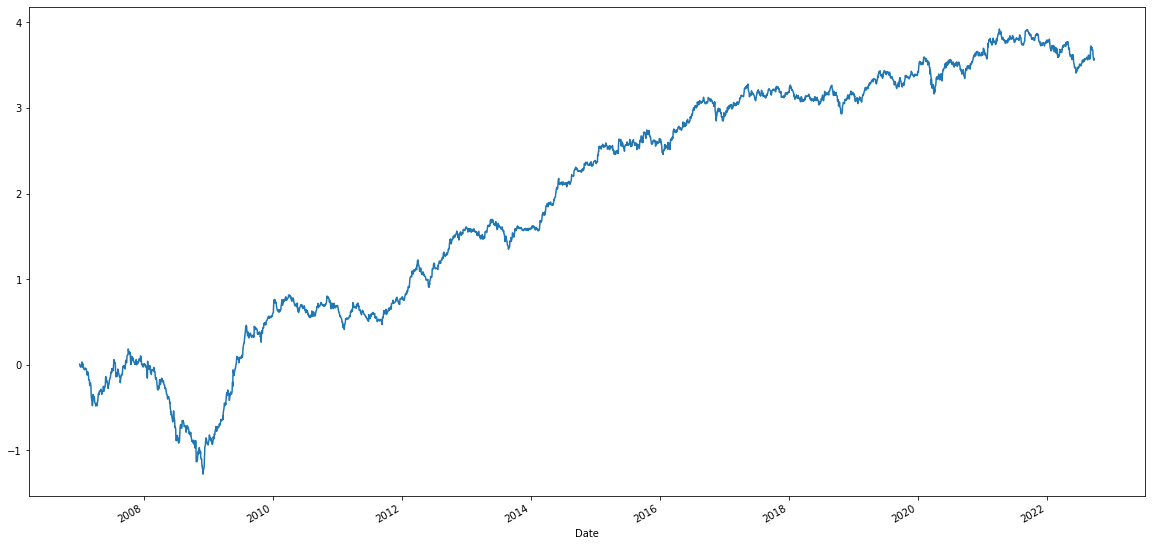

In [16]:
np.cumsum(df['pct']).plot(),np.cumsum(df['pct'])[-1]

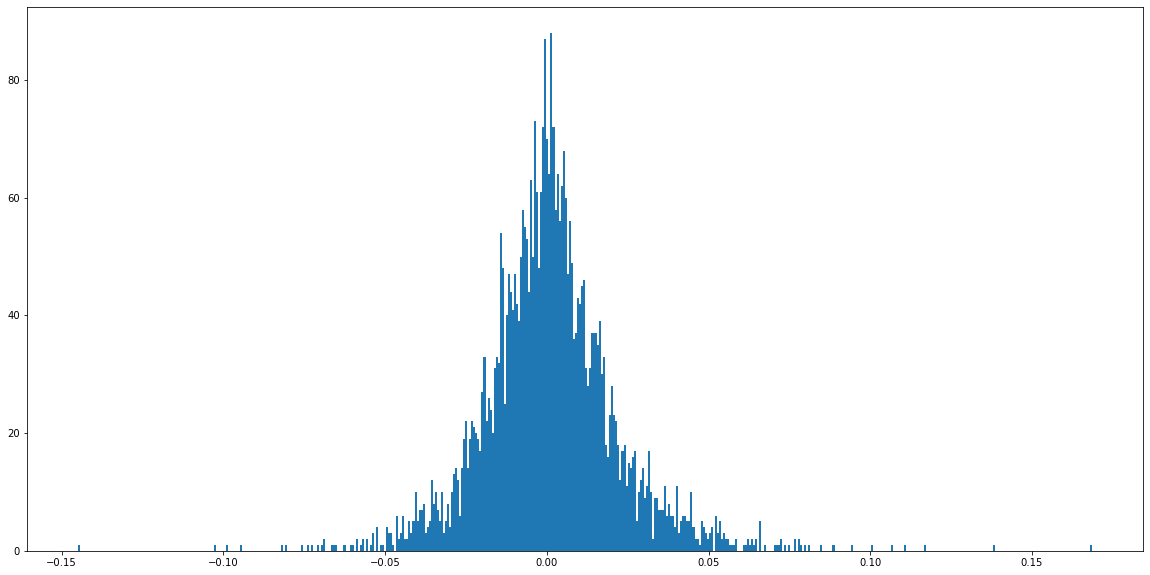

In [18]:
x =df['pct']
##Compare distributions of Largecap and Smallcap stocks
plt.hist(x,bins=500)
plt.show() 

# CAGR calculation

In [301]:
def cagrcalc(initial,final,t):
    return(((final/initial)**(1/t))-1)*100

In [302]:
cagrcalc(100000,200000,10)

7.177346253629313

In [297]:
df=yf.download(tickers=['^NSEI'],start='2008-9-24')['Adj Close']
df=df.dropna()

[*********************100%***********************]  1 of 1 completed


In [298]:
def cagr(df):
    return (((df[-1]/df[0])**(1/(len(df)/252)))-1)*100
    

In [299]:
cagr(df).round(2)

11.06

In [300]:
df,len(df)/252

(Date
 2008-09-24     4161.250000
 2008-09-25     4110.549805
 2008-09-26     3985.250000
 2008-09-29     3850.050049
 2008-09-30     3921.199951
                   ...     
 2022-09-19    17622.250000
 2022-09-20    17816.250000
 2022-09-21    17718.349609
 2022-09-22    17629.800781
 2022-09-23    17327.349609
 Name: Adj Close, Length: 3426, dtype: float64,
 13.595238095238095)

# Drawdown

In [151]:
def drawdown(df):
    df=df.dropna()
    df['pct']=df['Adj Close'].pct_change()
    df['Cumulative'] = df.pct.cumsum()
    df['HighValue'] = df['Cumulative'].cummax()
    df['Drawdown'] = df['Cumulative'] - df['HighValue']
    return (plt.plot(df['Drawdown']),df['Drawdown'].idxmin(),df['Drawdown'].min())

<AxesSubplot:xlabel='Date'>

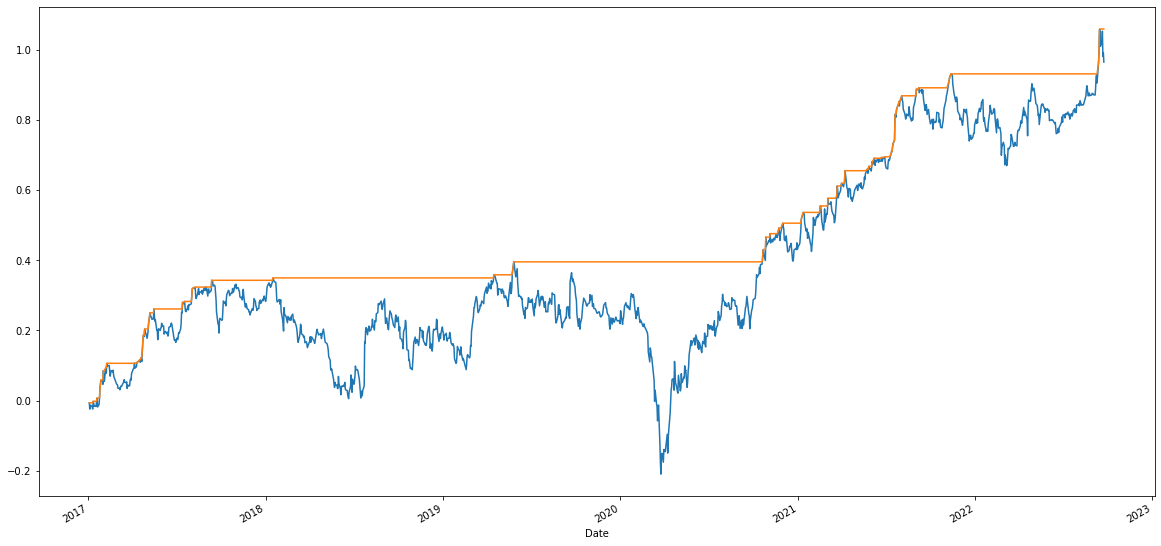

In [152]:
    df['pct']=df['Adj Close'].pct_change()
    df['Cumulative'] = df.pct.cumsum()
    df['HighValue'] = df['Cumulative'].cummax()
    df['Cumulative'].plot()
    df.HighValue.plot()

([<matplotlib.lines.Line2D at 0x1a4081995e0>],
 Timestamp('2020-03-25 00:00:00'),
 -0.6046666086180074)

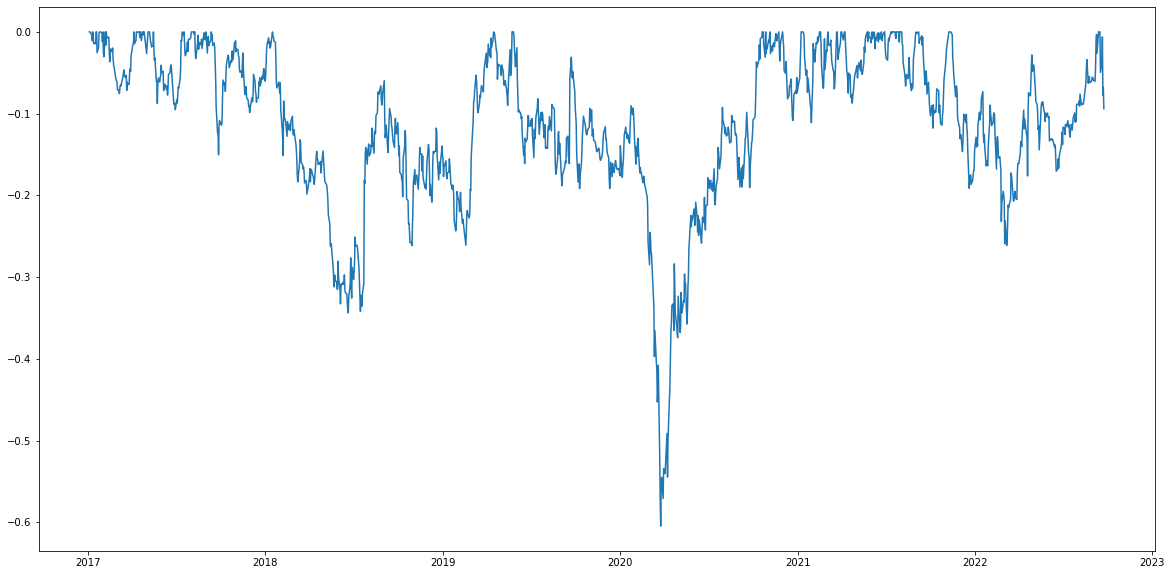

In [153]:
drawdown(df)

# Prepping the csv File

In [94]:
df=pd.read_csv("nifty50list.csv")
df['Symbol']=df['Symbol']+str(".NS")
ticker_list=df['Symbol'].to_list()

In [95]:
df=yf.download(tickers=ticker_list[0:10],start='2015-1-1')['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [98]:
df

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS
Date,,,,,,,,,,
2015-01-01,306.589447,1093.238525,710.637878,488.252899,1965.861084,128.114182,342.820038,319.925262,137.601257,811.325745
2015-01-02,306.397552,1095.131592,735.206360,499.171936,1965.540283,127.023857,337.339325,321.820618,135.539963,832.168274
2015-01-05,310.667053,1098.772949,735.158813,502.326447,1972.715576,125.336037,336.457733,314.679810,135.802887,832.743958
2015-01-06,308.796173,1066.050781,717.609924,484.370544,1957.323120,122.438393,335.585938,312.211426,134.435715,833.652100
2015-01-07,308.076599,1074.401123,732.028503,483.982330,1961.892944,122.333832,342.418427,312.960693,135.655624,884.085876
...,...,...,...,...,...,...,...,...,...,...
2022-09-19,959.599976,4308.200195,3316.250000,798.099976,3708.250000,1765.949951,7496.100098,782.750000,320.899994,3592.350098
2022-09-20,970.250000,4559.350098,3393.199951,812.750000,3768.600098,1799.599976,7635.399902,792.150024,322.899994,3650.600098
2022-09-21,932.900024,4604.799805,3356.050049,806.549988,3730.600098,1802.000000,7690.649902,780.200012,320.049988,3765.649902


In [131]:
df

,Open,High,Low,Close,Adj Close,Volume,pct,Cumulative,HighValue,Drawdown
Date,,,,,,,,,,
2007-01-03,38.400002,38.599998,37.299999,38.099998,24.399252,480314,NaN,NaN,NaN,NaN
2007-01-04,38.500000,39.000000,38.099998,38.200001,24.463301,497319,0.002625,0.002625,0.002625,0.000000
2007-01-05,38.200001,38.950001,37.599998,37.849998,24.239161,269101,-0.009162,-0.006537,0.002625,-0.009162
2007-01-08,38.000000,38.000000,37.200001,37.650002,24.111078,435548,-0.005284,-0.011821,0.002625,-0.014446
2007-01-09,37.599998,38.099998,36.549999,36.650002,23.470678,218726,-0.026560,-0.038382,0.002625,-0.041007
...,...,...,...,...,...,...,...,...,...,...
2022-09-19,342.600006,353.200012,337.799988,342.700012,342.700012,1958453,0.002340,4.530052,4.868437,-0.338385
2022-09-20,345.200012,353.100006,340.799988,351.250000,351.250000,2347637,0.024949,4.555001,4.868437,-0.313436
2022-09-21,353.500000,357.000000,342.100006,343.450012,343.450012,1490186,-0.022206,4.532795,4.868437,-0.335643


In [24]:
df=yf.download(tickers="^NSEBANK",interval='1mo')['Adj Close'].pct_change()
df2=yf.download(tickers="^NSEI",interval='1mo')['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
df=df.dropna()
df2=df2.dropna()

In [26]:
df.loc[df>0],df.loc[df<0]

(Date
 2007-11-01    0.040230
 2007-12-01    0.052017
 2008-04-01    0.146356
 2008-07-01    0.139843
 2008-08-01    0.064921
                 ...   
 2022-01-01    0.070280
 2022-03-01    0.004649
 2022-07-01    0.121654
 2022-08-01    0.054555
 2022-09-30    0.026142
 Name: Adj Close, Length: 97, dtype: float64,
 Date
 2008-01-01   -0.064602
 2008-02-01   -0.058301
 2008-03-01   -0.234032
 2008-05-01   -0.136931
 2008-06-01   -0.236515
                 ...   
 2022-02-01   -0.046611
 2022-04-01   -0.007848
 2022-05-01   -0.016647
 2022-06-01   -0.058113
 2022-09-01   -0.047778
 Name: Adj Close, Length: 79, dtype: float64)

(<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>)

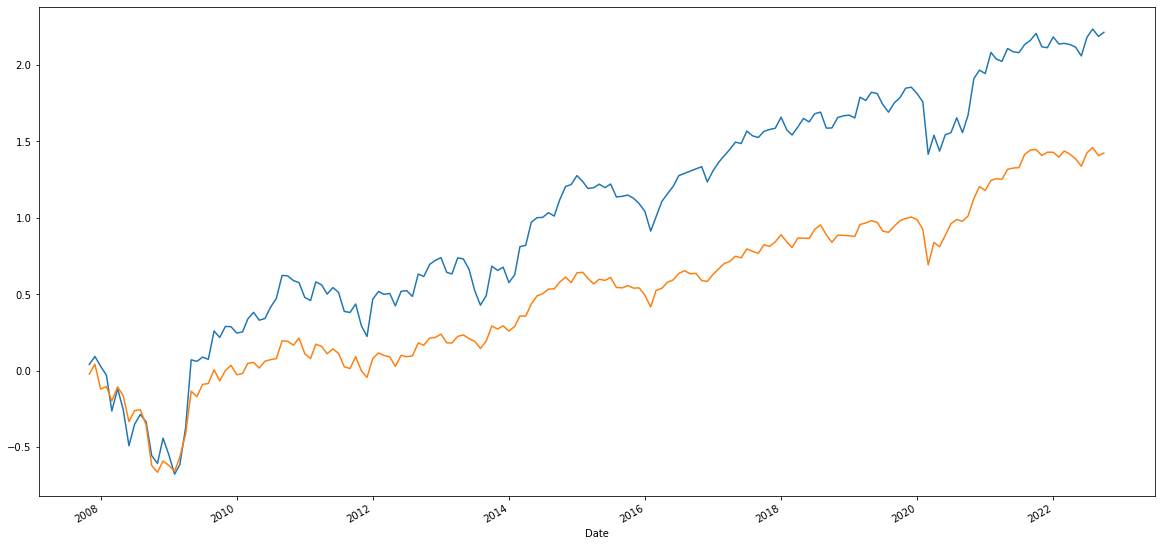

In [29]:
np.cumsum(df).plot(),np.cumsum(df2).plot()